In [5]:
from astroquery.gaia import Gaia
from functions import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from astropy.stats import sigma_clipped_stats
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import gaussian_kde
import matplotlib
from astroquery.simbad import Simbad
from astroquery.ipac.ned import Ned
from numpy.random import randint
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

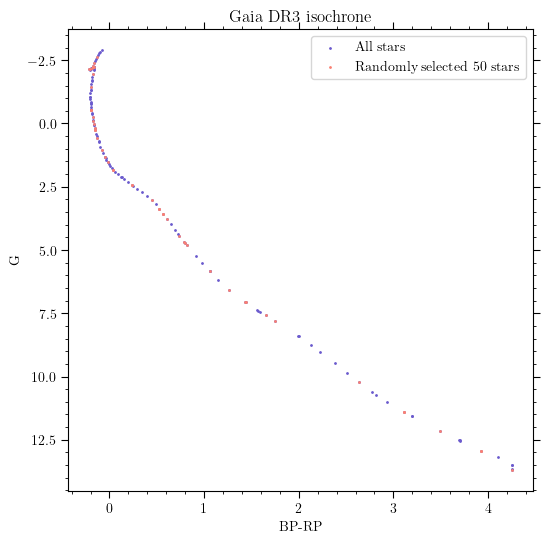

129


In [13]:
isochrone = pd.read_csv('isochrone.dat', sep='\s+')
isochrone = pd.DataFrame(isochrone)
#filtering red giants 
isochrone = isochrone[isochrone['logg'] > 3]
bprp = np.array(isochrone['G_BPmag'] - isochrone['G_RPmag'])
g = np.array(isochrone['Gmag'])
random_index = randint(0, len(isochrone), 50)
isochrone_new = isochrone.iloc[random_index]
bprp_new = np.array(isochrone_new['G_BPmag'] - isochrone_new['G_RPmag'])
g_new = np.array(isochrone_new['Gmag'])

plt.figure(figsize=(6,6))
plt.scatter(bprp, g, s=1, c='slateblue', label='All stars')
plt.scatter(bprp_new, g_new, s=1, c='salmon', label='Randomly selected 50 stars')
plt.gca().invert_yaxis()
plt.xlabel('BP-RP')
plt.ylabel('G')
plt.title('Gaia DR3 isochrone')
plt.legend()
plt.show()

print(len(isochrone))